### Frozen Lake 8*8

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

SFFF       (S: starting point, safe)

FHFH       (F: frozen surface, safe)

FFFH       (H: hole, fall to your doom)

HFFG       (G: goal, where the frisbee is located)


The episode ends when you reach the goal or fall in a hole. You receive a reward of 100 if you reach the goal, -100 if you fall into the hole, and -0.1 for each step you take.

### Getting Started

Run the following code and observe the result.

In [363]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()
for _ in range(20):
    env.render()
    state, reward, done, info = env.step(env.action_space.sample()) # Take a random action
    
env.close()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFF

What are the action space and the state space?

In [364]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(64)


What does the following code indicate?

In [365]:
env.P[1]

{0: [(0.15, 1, -0.1, False), (0.7, 0, -0.1, False), (0.15, 9, -0.1, False)],
 1: [(0.15, 0, -0.1, False), (0.7, 9, -0.1, False), (0.15, 2, -0.1, False)],
 2: [(0.15, 9, -0.1, False), (0.7, 2, -0.1, False), (0.15, 1, -0.1, False)],
 3: [(0.15, 2, -0.1, False), (0.7, 1, -0.1, False), (0.15, 0, -0.1, False)]}

In [366]:
print(env.P[0][2])
print(env.nS)
print(env.nA)

[(0.15, 8, -0.1, False), (0.7, 1, -0.1, False), (0.15, 0, -0.1, False)]
64
4


In [367]:
env.P[0]

{0: [(0.15, 0, -0.1, False), (0.7, 0, -0.1, False), (0.15, 8, -0.1, False)],
 1: [(0.15, 0, -0.1, False), (0.7, 8, -0.1, False), (0.15, 1, -0.1, False)],
 2: [(0.15, 8, -0.1, False), (0.7, 1, -0.1, False), (0.15, 0, -0.1, False)],
 3: [(0.15, 1, -0.1, False), (0.7, 0, -0.1, False), (0.15, 0, -0.1, False)]}

### Value Iteration

Find the best policy using the Value Iteration algorithm.

In [368]:
table = np.zeros((8,8))
val = {b'S':1,b'F':0,b'H':-1,b'G':1}

Text(0.5, 1.0, 'the env')

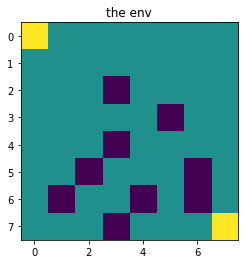

In [369]:
for i in range(8):
    for j in range(8):
        table[i,j] = val[env.desc[i,j]]
plt.imshow(table)
plt.title('the env')
    

In [370]:
def row_col_finder(state):
    i = state//8
    j = state%8
    return i,j

In [371]:
row_col_finder(8)

(1, 0)

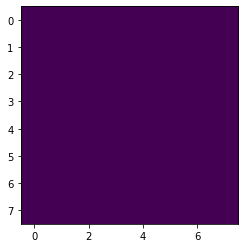

In [372]:
V = np.zeros((8,8))
plt.imshow(V)
v = 0

Text(0.5, 1.0, 'the env')

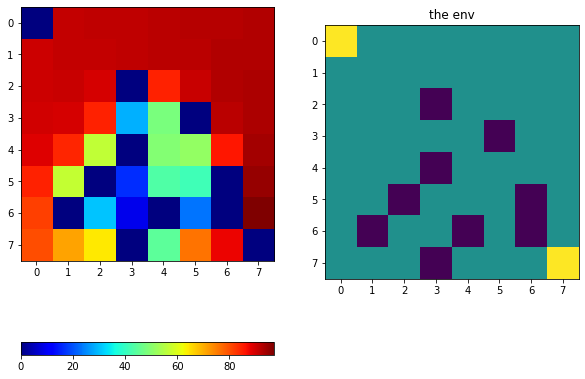

In [374]:
delta = 0
for run in range(100):
    for state in range(env.nS):
        Qs = []
        v = V[row_col_finder(state)]
        if env.desc[row_col_finder(state)] == b'H' or  env.desc[row_col_finder(state)]==b'S':
            continue 
        for action in range(env.nA):
            q_action = 0
            possible_actions = env.P[state][action]
            for elem in possible_actions:
                q_action+=elem[0]*(elem[2]+gamma*V[row_col_finder(elem[1])])

            Qs.append(q_action)

        V[row_col_finder(state)] = np.max(Qs)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
im = ax.imshow(V,cmap='jet')
fig.colorbar(im,orientation='horizontal') 
ax2 = fig.add_subplot(122)
ax2.imshow(table)
ax2.set_title('the env')

In [375]:
policy = np.zeros((8,8))
for state in range(env.nS):
    Qs = []
    for action in range(env.nA):
        q_action = 0
        possible_actions = env.P[state][action]
        for elem in possible_actions:
            q_action+=elem[0]*(elem[2]+gamma*V[row_col_finder(elem[1])])

        Qs.append(q_action)
    policy[row_col_finder(state)] = np.argmax(Qs)
    

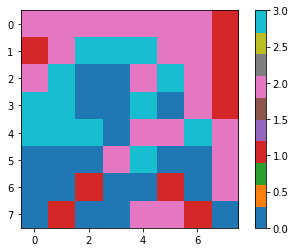

In [376]:
plt.imshow(policy,cmap='tab10')
plt.colorbar()

In [377]:
move = {2:'$\\rightarrow$',1:'$\\downarrow$',3:'$\\uparrow$',0:'$\\leftarrow$'}

Text(0.5, 1.0, 'The moves')

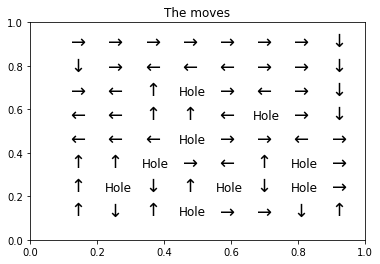

In [378]:
d = 1/9
for i in range(1,9):
    for j in range(1,9):
        if table[i-1,j-1]==-1:
            plt.text(d*j,1-d*i,'Hole',size=12)
            continue
        plt.text(d*j,1-d*i,move[policy[i-1,j-1]],size=18)
plt.title("The moves")    


Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

In [382]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()
state=0
while state != 63:
    env.render()
    state, reward, done, info = env.step(int(policy[row_col_finder(state)])) # Take a random action

env.render()    
env.close()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF


# Hooray! The agent could reach his home !